(100000,)


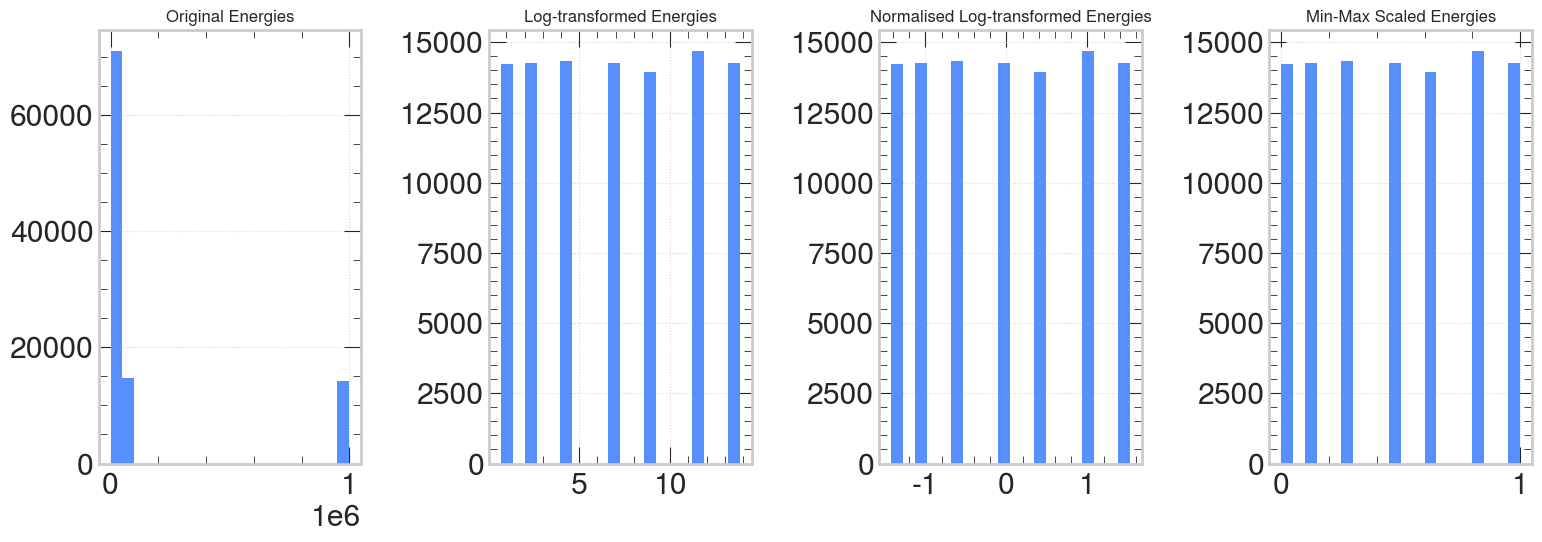

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplhep


energies = np.array([1, 10, 100, 1000, 10000, 100000, 1000000])

num_events = 100000

more_energies = np.random.choice(energies, size=num_events, replace=True)

# log transform
log_energies = np.log1p(more_energies)
print(log_energies.shape)

# log transform

# normalise the log-transformed energies to have zero mean and unit variance
mean = log_energies.mean()
std = log_energies.std()
normalised_log_energies = (log_energies - mean) / (std + 1e-7)

min_val = normalised_log_energies.min()
max_val = normalised_log_energies.max()
min_max_scaled_energies = (normalised_log_energies - min_val) / (max_val - min_val + 1e-7)

mplhep.style.use("ROOT")

plt.figure(figsize=(16, 6))

plt.subplot(1, 4, 1)
plt.title("Original Energies", fontsize=12)
plt.hist(more_energies, bins=20)

plt.subplot(1, 4, 2)
plt.title("Log-transformed Energies", fontsize=12)
plt.hist(log_energies, bins=20)

plt.subplot(1, 4, 3)
plt.title("Normalised Log-transformed Energies", fontsize=12)
plt.hist(normalised_log_energies, bins=20)

plt.subplot(1, 4, 4)
plt.title("Min-Max Scaled Energies", fontsize=12)
plt.hist(min_max_scaled_energies, bins=20)


plt.tight_layout()
#plt.savefig("ObjectEnergyExample.pdf")
plt.show()


## Some Reasoning

- For the energy spectrum of the particle objects, due to the orders of magnitue between some values this can lead to a highly skewed distributon. In order to make our inputs suitable for an ML algorithm , we need to pre-process the inputs to display a higher level of normality (this helps things like convergence and stability during the gradient descent). -> stabilise the variance.

- In order to do this, we first perform a log transformation to reduce the wide dynamic range of the feature spectrum and aid the normalisation process. We then apply a min-max scaling style of normalistion in order to preserve the inherent physics `prior` that these values must be `>0`. The values are scaled between [0-1]